In [5]:
from rdkit import Chem
print(Chem.MolFromSmiles('CCO'))  # Should return a molecule object


In [6]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

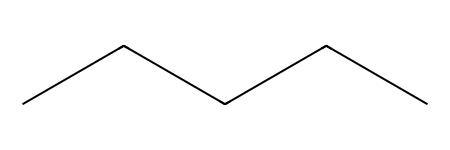

In [15]:
mol = Chem.MolFromSmiles('CCCCC')
mol

In [8]:
smiles = Chem.MolToSmiles(mol)
smiles

'CCCCC'

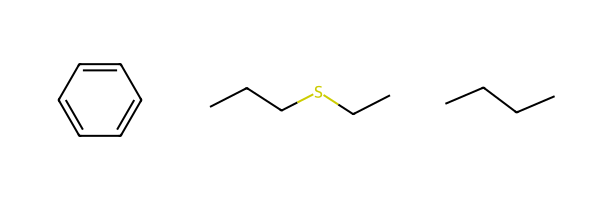

In [9]:
smiles_list = ['c1ccccc1' , 'CCCSCC' , 'CCCC']

#Show 2d molecules from smiles
mol_list = []
for smiles in smiles_list:
  mol = Chem.MolFromSmiles(smiles)
  mol_list.append(mol)

#When we want to show more than one molecules
img = Draw.MolsToGridImage(mol_list, molsPerRow=3)
img

In [10]:
#When we want to check if it has something in the items in a list
pattern = Chem.MolFromSmiles('S')

for mol in mol_list:
  print(mol.HasSubstructMatch(pattern))


False
True
False


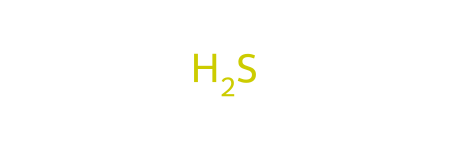

In [16]:
#To see what we are searching as our pattern
Chem.MolFromSmiles('S')

In [12]:
#Smarts: When we want to check if it has something general like rings in a list
pattern = Chem.MolFromSmarts('[r]')
# [r6] for Hexagon, [r5] for pantagon ...
for mol in mol_list:
  print(mol.HasSubstructMatch(pattern))


True
False
False


import requests
morphine_url = 'https://go.drugbank.com/structures/small_molecule_drugs/DB00295.mol'
morphine_mol = requests.get(morphine_url).text
print(morphine_mol[:500])  # Show first 500 characters
#morphine = Chem.MolFromMolBlock(morphine_mol)
#morphine

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}
response = requests.get(morphine_url, headers=headers) #headers in case of helping with Authentication 
from rdkit.Chem import AllChem
morphine = AllChem.MolFromMolBlock(requests.get(morphine_url).text)
morphine_mol = morphine_mol.strip()  # Remove leading/trailing whitespace
morphine


# Introduction part 2

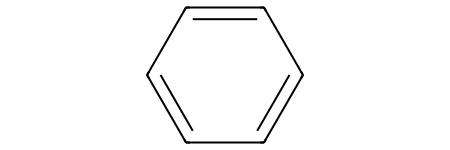

In [34]:
benzene = mol_list[0]
benzene 

In [37]:
fp = AllChem.GetMorganFingerprintAsBitVect(benzene, 2, nBits=1024)

fp_arr = np.zeros((1,))

DataStructs.ConvertToNumpyArray(fp, fp_arr)

print(fp_arr)

[0. 0. 0. ... 0. 0. 0.]


[19:02:18] DEPRECATION WARNING: please use MorganGenerator


In [39]:
fpgen = AllChem.GetMorganGenerator(radius=2)
m1 = Chem.MolFromSmiles('Cc1ccccc1')
fp1 = fpgen.GetSparseCountFingerprint(benzene)
fp1